In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jaxgp.tests as tests

In [3]:
def sin(x):
    return jnp.sin(2*x[0] + x[1])

In [4]:
names = ["franke", "himmelblau", "easom", "ackley", "sin"]

optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

functions = [tests.testfunctions.franke,tests.testfunctions.himmelblau, tests.testfunctions.easom, tests.testfunctions.ackley, sin]

ranges = [(jnp.array([0.0,1.0]), jnp.array([0.0,1.0])), 
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([-10.0,10.0]), jnp.array([-10.0,10.0])),
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([0.0,2*jnp.pi]), jnp.array([0.0,2*jnp.pi]))]


num_gridpoints = jnp.array([100,100])

In [5]:
with open("compare_optimizers.txt", mode="w") as f:
    tests.optimizertesting.compare_optimizer_data(functions, ranges, names, optimizers, num_gridpoints, "./prediction_files", f.write)

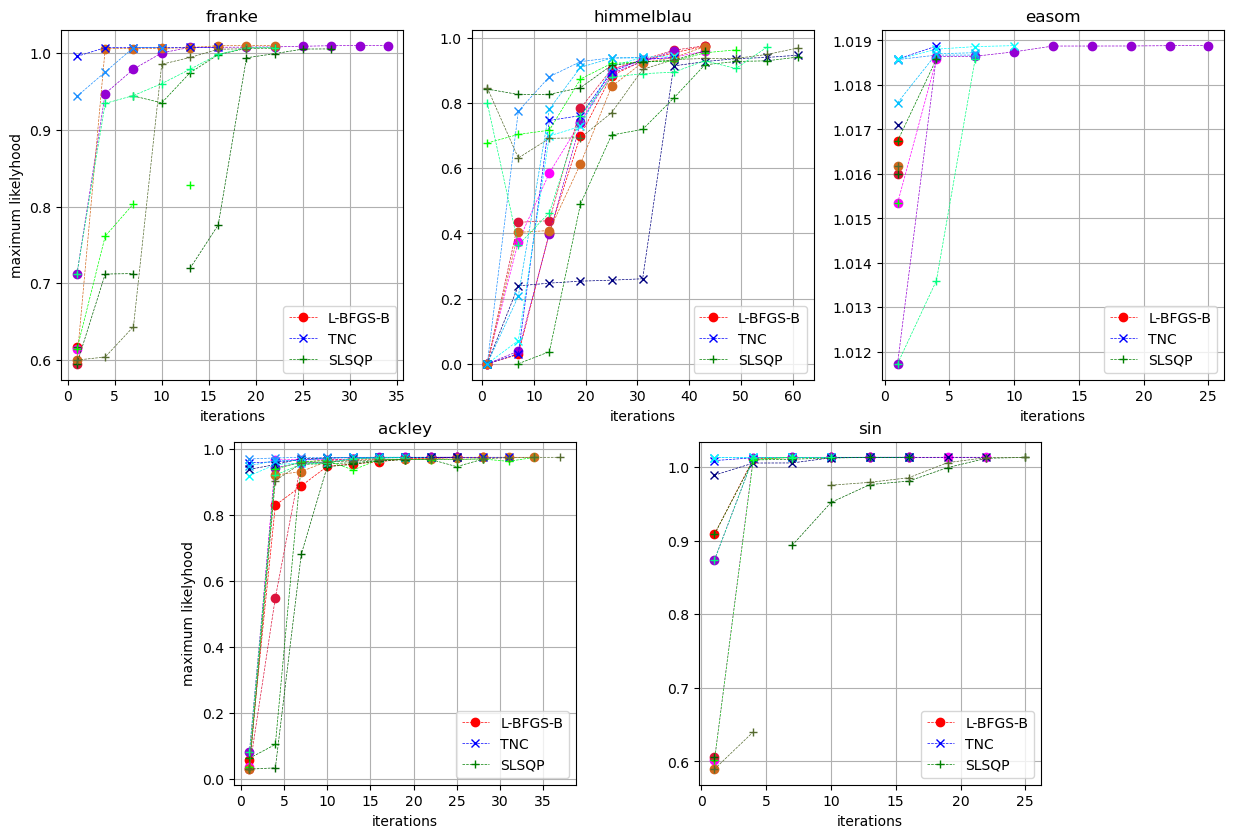

In [111]:
colors = [["red", "magenta", "crimson", "darkviolet", "chocolate"], 
          ["blue", "dodgerblue", "cyan", "navy", "deepskyblue"], 
          ["green", "lime", "darkgreen", "springgreen", "darkolivegreen"]]
markers = ["o", "x", "+"]
step = 3

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

for i,name in enumerate(names):
    (j,k) = i // 3, i % 3

    for optimizer, colortype, marker in zip(optimizers, colors, markers):
        losses = jnp.load(f"./prediction_files/{name}losses{optimizer}.npz")
        for ind,(loss, color) in enumerate(zip(losses.values(), colortype)):
            loss = jnp.exp(-loss)
            if i == 1: step = 6
            else: step = 3
            ran = jnp.arange(1,len(loss)+1,step)
            if ind == 0:
                axes[j,k].plot(ran,loss[::step], color=color, marker=marker, ls="--",lw=0.5,label=f"{optimizer}")
            else:
                axes[j,k].plot(ran,loss[::step], color=color, marker=marker, ls="--",lw=0.5)
      
    axes[j,k].set_title(name)
    axes[j,k].set_xlabel("iterations")
    if k == 0:
        axes[j,k].set_ylabel("maximum likelyhood")
    axes[j,k].legend()
    axes[j,k].grid()

fig.savefig("losses.png")

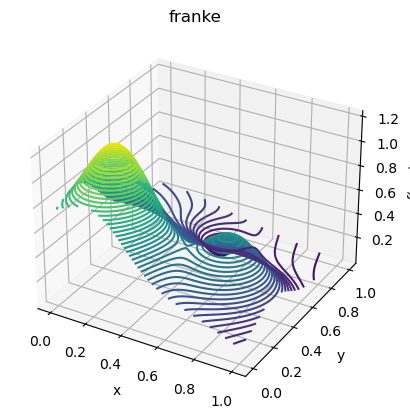

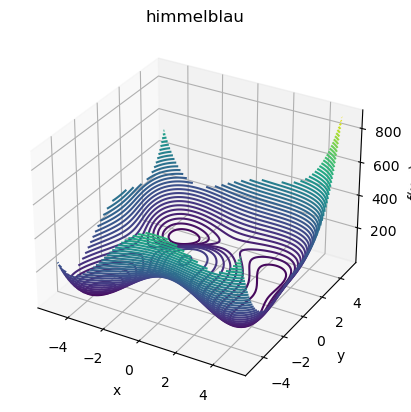

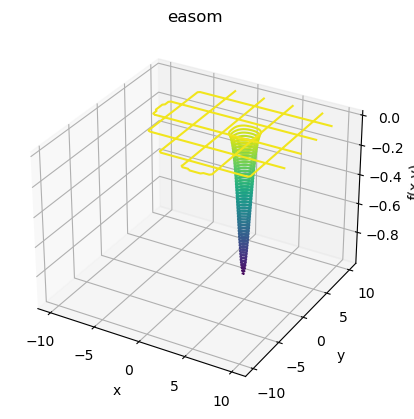

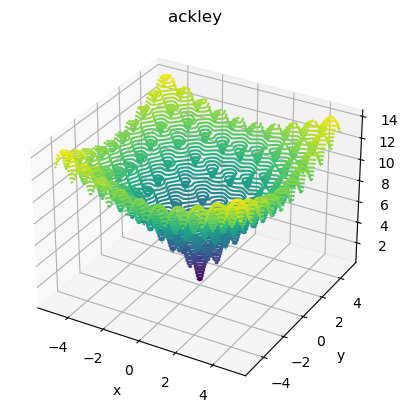

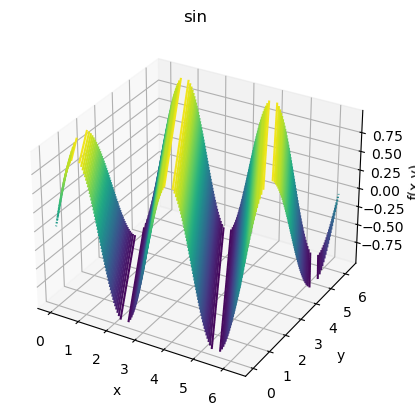

In [108]:
for i,(name, fun, ran) in enumerate(zip(names, functions, ranges)):
    _, Y = tests.optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
    Y = Y[:,0].reshape(*num_gridpoints)
    X1 = jnp.linspace(*ran[0], num_gridpoints[0])
    X2 = jnp.linspace(*ran[1], num_gridpoints[1])

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X1, X2, Y, 50, cmap='viridis')
    ax.set_title(name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")

    fig.savefig(f"{name}plot.png")

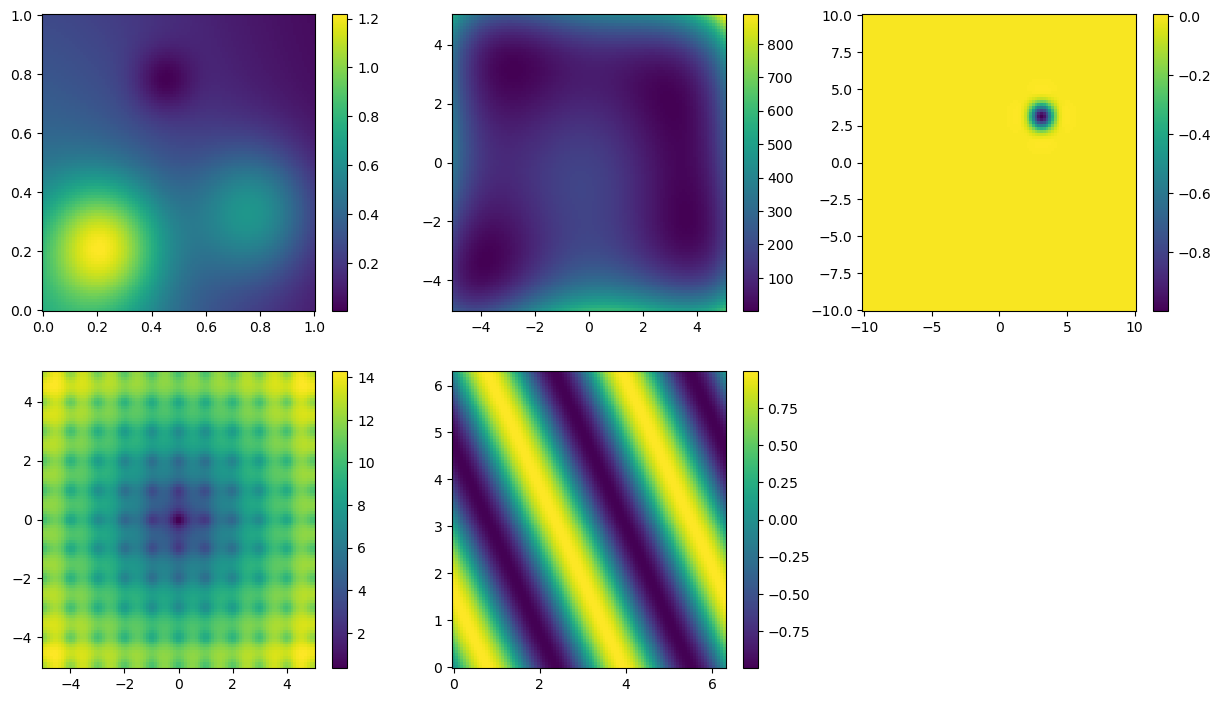

In [64]:
fig, axes = plt.subplots(2,3, figsize=(15,8.5))

axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

for i,(name, fun, ran) in enumerate(zip(names, functions, ranges)):
    _, Y = tests.optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
    Y = Y[:,0].reshape(*num_gridpoints)
    X1 = jnp.linspace(*ran[0], num_gridpoints[0])
    X2 = jnp.linspace(*ran[1], num_gridpoints[1])

    (j,k) = i // 3, i % 3
    im = axes[j,k].pcolormesh(X1, X2, Y)
    fig.colorbar(im, ax=axes[j, k])

    axes
    

In [7]:
X, Y = tests.optimizertesting.create_training_data_2D(0, num_gridpoints, ranges[0], 0.0, tests.testfunctions.franke)
Y = Y[:,0]

means = jnp.load("./prediction_files/frankemeansTNC.npz")
stds = jnp.load("./prediction_files/frankestdsTNC.npz")

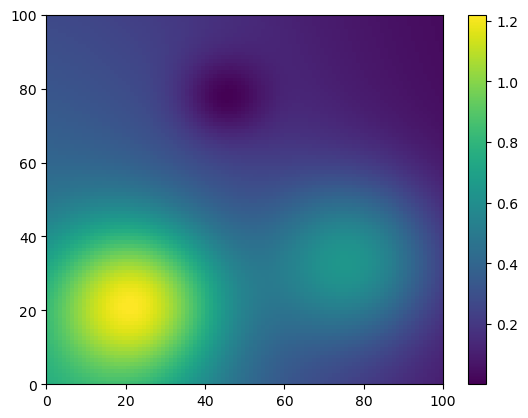

In [8]:
plt.pcolormesh(Y.reshape(100,100))
plt.colorbar()

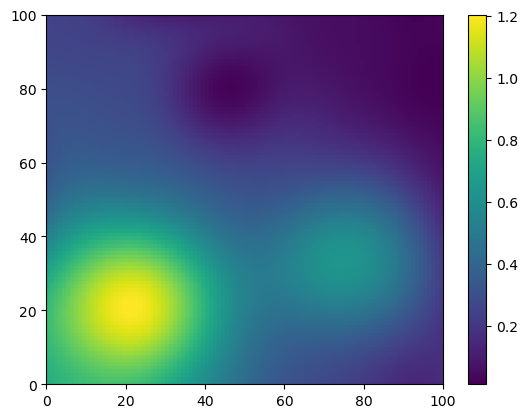

In [9]:
plt.pcolormesh(means["arr_0"].reshape(100,100))
plt.colorbar()

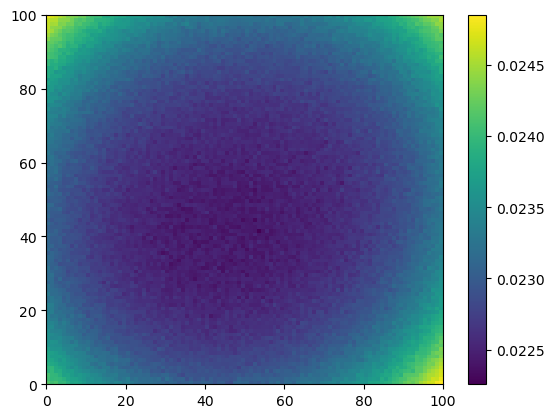

In [10]:
plt.pcolormesh(stds["arr_1"].reshape(100,100))
plt.colorbar()

In [11]:
losses = jnp.load("./prediction_files/sinlossesL-BFGS-B.npz")

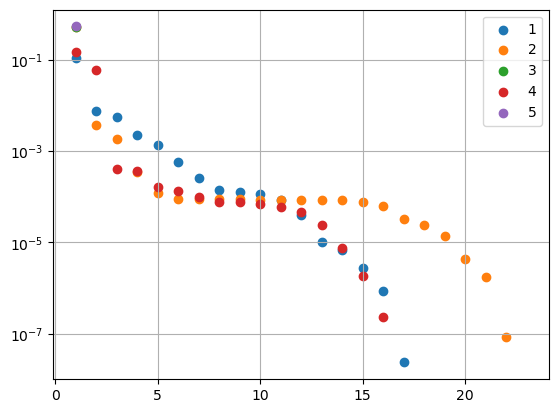

In [12]:
mins = []
for i,loss in enumerate(losses.values()):
    mins.append(jnp.min(loss))

min = jnp.min(jnp.array(mins))

for i,loss in enumerate(losses.values()):
    plt.scatter(jnp.arange(1,len(loss)+1),loss-min, label=i+1)

plt.legend()
plt.grid()
plt.yscale("log")

In [13]:
print(mins)

[DeviceArray(-0.01300929, dtype=float32), DeviceArray(-0.01300929, dtype=float32), DeviceArray(0.5011857, dtype=float32), DeviceArray(-0.01300906, dtype=float32), DeviceArray(0.5283308, dtype=float32)]
